# Set up and load data

In [69]:
# import packages and data, set up target
# do intiial data exploration/cleaning

# fit model
# predict
# evaluate (accuracy, precision, recall, f1, confusion matrix)
# interpret (coef)

In [92]:
!pip install -q kaggle scikit-learn pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/titanic_train.csv')

In [73]:
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Clean and preprocess data

In [75]:
# check for nulls and fill
print(data.isna().sum())
print(data.count())

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
# DROP: data['Cabin']

#REDEFINE X
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [76]:
# check for relationship to target

display(data.groupby('Pclass')['Survived'].mean())
display(data.groupby('Sex')['Survived'].mean())

age_bins = pd.cut(data['Age'], bins=[0, 10, 20, 40, 60, 80, 100])
display(data.groupby(age_bins)['Survived'].mean())
display(data.groupby('SibSp')['Survived'].mean())
display(data.groupby('Parch')['Survived'].mean())
display(data.groupby(age_bins)['Survived'].mean())

fare_bins = pd.cut(data['Fare'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280])
display(data.groupby(fare_bins)['Survived'].mean())
display(data.groupby('Embarked')['Survived'].mean())

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


,Survived
Sex,
female,0.742038
male,0.188908


/tmp/ipython-input-4025379798.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data.groupby(age_bins)['Survived'].mean())


,Survived
Age,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 40]",0.364769
"(40, 60]",0.390625
"(60, 80]",0.227273
"(80, 100]",NaN


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


/tmp/ipython-input-4025379798.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data.groupby(age_bins)['Survived'].mean())


,Survived
Age,
"(0, 10]",0.593750
"(10, 20]",0.382609
"(20, 40]",0.364769
"(40, 60]",0.390625
"(60, 80]",0.227273
"(80, 100]",NaN


/tmp/ipython-input-4025379798.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(data.groupby(fare_bins)['Survived'].mean())


,Survived
Fare,
"(0, 20]",0.284000
"(20, 40]",0.430000
"(40, 60]",0.574074
"(60, 80]",0.520833
"(80, 100]",0.857143
"(100, 120]",0.733333
"(120, 140]",0.857143
"(140, 160]",0.666667
"(160, 180]",1.000000


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [77]:
#handle categorical variables

cat_X = pd.get_dummies(X, drop_first = True)
print(cat_X)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500      True       False        True
1         1  38.0      1      0  71.2833     False       False       False
2         3  26.0      0      0   7.9250     False       False        True
3         1  35.0      1      0  53.1000     False       False        True
4         3  35.0      0      0   8.0500      True       False        True
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000      True       False        True
887       1  19.0      0      0  30.0000     False       False        True
888       3  28.0      1      2  23.4500     False       False        True
889       1  26.0      0      0  30.0000      True       False       False
890       3  32.0      0      0   7.7500      True        True       False

[891 rows x 8 columns]


<Axes: >

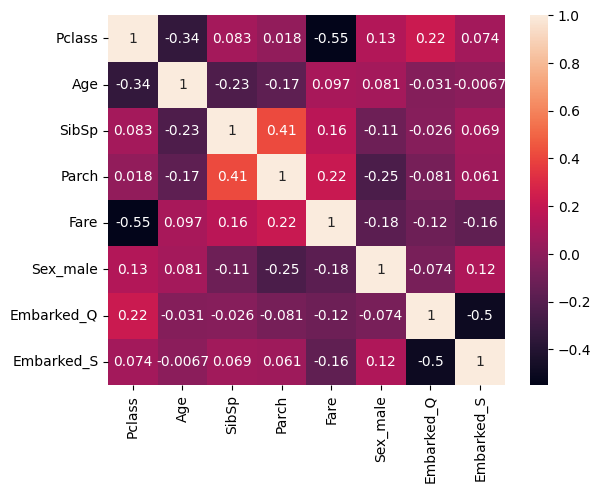

In [78]:
# check for correlation to one another, get rid if >0.9 corr

sns.heatmap(cat_X.corr(), annot=True)


In [79]:
# check for class balance

total_survived = (data['Survived'] ==1).sum()
total_did_not_survive = (data['Survived'] ==0).sum()

print(total_survived)
print(total_did_not_survive)

# so don't need to change my data and under/over sample probably (if i did: in my model: class_balance = true)
# instead i should make sure i do stratified sampling though so there is an even share in test and train

342
549


# Prepare Data for Modeling

In [80]:
X_train, X_test, y_train, y_test = train_test_split(cat_X, y, test_size = 0.2, random_state = 3, stratify=y)

In [81]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Model Training & Predictions

In [82]:
pd.DataFrame(X_train_scaled).isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


In [83]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [97]:
y_predict = model.predict(X_test_scaled)
y_predict_prob = model.predict_proba(X_test_scaled)[:,1]

# Evaluate Model

In [105]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
c_matrix = confusion_matrix(y_test, y_predict)
AUC = roc_auc_score(y_test, y_predict_prob)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)
print("c_matrix:", c_matrix)
print("AUC:", AUC)


accuracy: 0.8268156424581006
precision: 0.7714285714285715
recall: 0.782608695652174
f1: 0.7769784172661871
c_matrix: [[94 16]
 [15 54]]
AUC: 0.8964426877470356


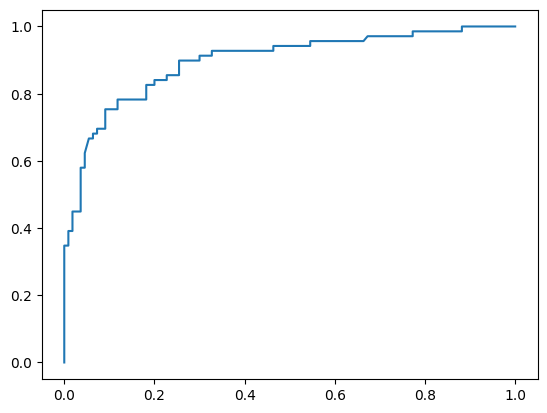

In [108]:
# plot ROC curve to see if we should change our threshold
fpr, tpr, thresholds = roc_curve(y_test, y_predict_prob)
plt.plot(fpr, tpr)

# Interpret Model

In [126]:
pd.DataFrame({'feature':cat_X.columns, 'coef': model.coef_[0], 'odds': np.exp(model.coef_[0])})

,feature,coef,odds
0,Pclass,-0.895860,0.408257
1,Age,-0.540583,0.582409
2,SibSp,-0.353676,0.702102
3,Parch,-0.067012,0.935184
4,Fare,0.006464,1.006485
5,Sex_male,-1.197920,0.301821
6,Embarked_Q,-0.068530,0.933765
7,Embarked_S,-0.229065,0.795277
